<a href="https://colab.research.google.com/github/JewareSM/Data-Visualization-Tools/blob/main/DSML_Advanced_Pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Business Case -

'''
 Business case study for today is IMDb.
 Imagine that you are working as DS for Fractal Analysis, and you are analyzing some movie trends for clients
 Examples - Some trends related to movie.
            Some trends related to director.

IMDb : IMDb is one of biggest online database of information related to movies.
       Database contain multiple information about movies,rating,director,average ratings of IMDb users,popularity of cast,revenue,budget of movie .    
'''

In [ ]:
#Let's download dataset - Today we have two datasets 

''' Movies Dataset '''

! gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 68.2MB/s]


* Movies Dataset Link - https://drive.google.com/file/d/1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd/view?usp=sharing

In [ ]:
''' Directors Dataset '''

!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 58.2MB/s]


* Directors Dataset Link - https://drive.google.com/file/d/1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm/view

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Movies Dataset -

movies = pd.read_csv("movies.csv")

In [ ]:
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
#Directors Dataset -

directors = pd.read_csv('directors.csv')
directors.head()

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male


In [ ]:
#Let's learn how to concat or mearge two dataframes together 

In [ ]:
a = pd.DataFrame({'A':[10,30], 'B':[20,40]})
b = pd.DataFrame({'A':[10,30], 'C':[20,40]})

In [ ]:
a

,A,B
0,10,20
1,30,40


In [ ]:
b

,A,C
0,10,20
1,30,40


* Here we have two dataframes ' a ' and ' b ' .

* ' a ' dataframe with two rows , with column ' A ' and ' B ' .

* ' b ' dataframe with two rows , with column ' A ' and ' C ' .


* Think of this blue box as dataframe ' a ' .

* Think of this red box as dataframe ' b ' .


* You can concat them horizontally . ( axis = 1 ) 

* You can concat them vertically .  ( axis = 0 )


* Image   -  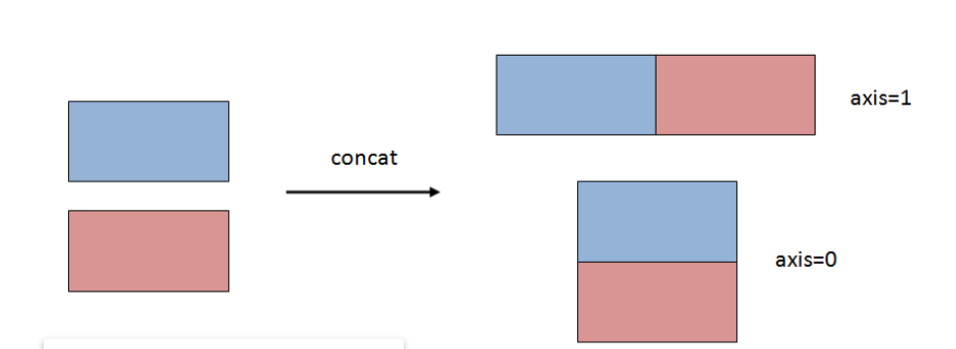

In [ ]:
#Concat function -

''' 
In concat function first you have to provide multiple dataframes or iterable dataframes(lists of dataframe which you want to stack)
and second think you have provide is axis , along which axis you want to concat dataframes .     

'''

pd.concat([a,b], axis = 0)           #Concatenation along vertical axis     ----- {I}

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


* Since ' a ' didn't have this column ' c ' ,  it addes this NaN values corresponding to the column ' c '  , and it addes NaN values corresponding  to the column ' b ' for the dataframe ' b ' .


In [ ]:
pd.concat([a,b])       

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


* If we don't provide axis , then the default value of axis is ' 0 ' .
* It will concat dataframes vertically .

In [ ]:
pd.concat([a,b], axis = 1)      #Concatenation along horizantal axis 

,A,B,A,C
0,10,20,10,20
1,30,40,30,40


In [ ]:
''' 
In vertical concat notice that this guy didn't change there row labels .
0,1 were the row labels earlier and 0,1 after that .
So there is a repatibility of row labels which is not good and this is not a required character .

'''

In [ ]:
#Let's try to access all the rows with row label '0'

pd.concat([a,b], axis = 0).loc[0]

,A,B,C
0,10,20.0,NaN
0,10,NaN,20.0


* We know that pandas allowed using a particular row label multiple times . 

* As you can see ' 0 ' is used  multiple times , but this not good and  this is not a required character .

In [ ]:
'''
If you want this labels to be sorted, new labels to be assigned so pass one more argument to concat function which is 'ignore_index' .
By default value of ignore_index is 'False'

We have to say ignore_index = True , it would actually ignore indexes and allocate new indexes by itself .

'''

In [ ]:
pd.concat([a,b], axis = 0, ignore_index = True)

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
2,10,NaN,20.0
3,30,NaN,40.0


In [ ]:
#Multilevel indexing -

'''
If you want to stack these multiple dataframes while keeping them separate so you can use multilevel indexing .

To do this you have to pass argument 'keys' .

'''

pd.concat([a,b], keys = ["x","y"])

A     B     C
x 0  10  20.0   NaN
  1  30  40.0   NaN
y 0  10   NaN  20.0
  1  30   NaN  40.0

* Notice that there is two level indexing .
* First level indexing which trying to keep things separate . 


* key ' x '  corresponds to dataframe ' a ' .
* key ' y '  corresponds to dataframe ' b ' .

In [ ]:
#Let's access data -

pd.concat([a,b], keys = ["x","y"]).loc["x"]

,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN


* This gives us first dataframe which is ' a ' .

In [ ]:
pd.concat([a,b], keys = ["x","y"]).loc["y"]

,A,B,C
0,10,NaN,20.0
1,30,NaN,40.0


* This gives us second dataframe which is ' b ' .

In [ ]:
a          #Dataframe 'a'

,A,B
0,10,20
1,30,40


In [ ]:
b          #Dataframe 'b'

,A,C
0,10,20
1,30,40


* We have dataframe ' a ' and dataframe ' b ' .

* Now dataframe ' a ' has column ' A ' and dataframe ' b ' has column ' A ' .

* Sometimes ,  I just want to concatenate the data in a such way that ,  I just want to join those columns which are actually intersectional , which are present in both the ends .


* We are saying if column ' A ' exists in both join them .
* If column ' B ' dosen ' t exists in both just neglect it .
* If column ' C ' dosen ' t exists in both just neglect it .


* So here question is what if , if we want to only get the intersection of columns which are common .

* This type of concatenation where you just trying to join things which are common is called as inner concatenation or inner join 


In [ ]:
pd.concat([a,b], axis = 0, join = "inner")       #inner concatenation

,A
0,10
1,30
0,10
1,30


* Here we get intersection of dataframe ' a ' and dataframe ' b ' .

In [ ]:
pd.concat([a, b], axis=0, join = "outer")     #outer concatenation      ------{II}


,A,B,C
0,10,20.0,NaN
1,30,40.0,NaN
0,10,NaN,20.0
1,30,NaN,40.0


* In above example no information is missing , we are adding whatever is in dataframe ' a ' and dataframe ' b ' .

* Basically we are not losing any information , by default the entries for which no data is available are filled by these ' NaN ' called as outer concatenation or outer join .


* From { I } :  by default this joins in outer fasion even if we have not mention any join .

* From { I }  and { II } both are same , both are outer join .

In [ ]:
#Merge function -

''' 
   The concat function simply stacks multiple dataframes together along with a particular axis .

   Where as mereg is trying to combine dataframes side by side .
'''

' \n   The concat function simply stacks multiple dataframes together along with a particular axis .\n\n   Where as mereg is trying to combine dataframes side by side .\n'

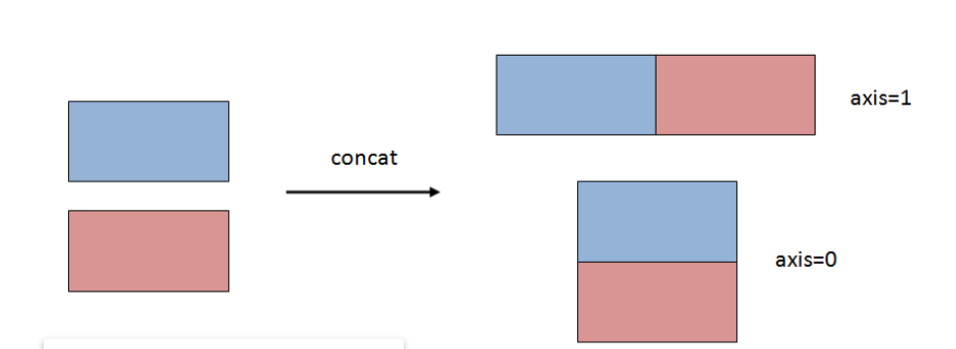









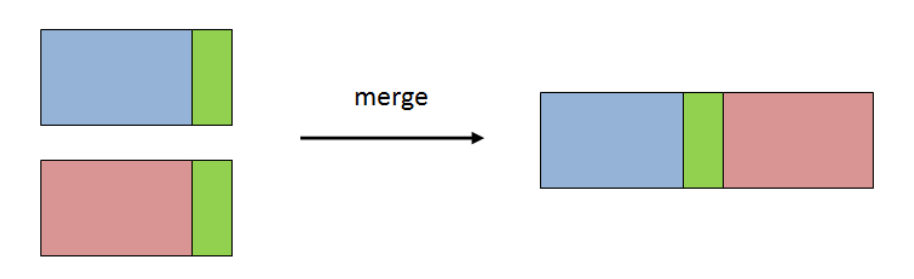

* Here we are trying to join rows in a form of, based on shared values in the columns .

* Now we are caring about data as well . 

* Earlier we were doing very dumb kind of attempt , we were just stacking stuff .

* In merge we are trying to do smartly join the rows , we are caring about the data .


* NOTE -  This merging which is also similar to what you learn in SQL , it called as join in SQL .

In [ ]:
#Example - 

'''
We are working on chat application

dataframe '1' has information about users .
dataframe '2' has information about messages which were shared between two users .

'''

#Let's create dataframe  



In [ ]:
#Users dataframe -

users = pd.DataFrame({"userid" : [1,2,3], "name" : ["A", "B", "C"]})

In [ ]:
users

,userid,name
0,1,A
1,2,B
2,3,C


* Here we have defined a dictionary ,  we pass data as dictionary and 1st column is ' userid ' and userids are 1 , 2 , 3 .  And users have their name also , which are A , B , and C .


In [ ]:
#Messages dataframe - 

msgs = pd.DataFrame({"userid" : [1,1,2], "msg" : ["hello", "bye", "hi"]})

In [ ]:
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi


* Here we done same thing , In messages dataframe 1st column is  ' userid ' and userids are 1 , 1 , 2 .

* User ' 3 ' was inactive , maybe user ' 3 ' didn't send any message . 

In [ ]:
#Now lets say you are working on some analytics and you want know name of person who sent this message 'bye' 

'''
To perform this kind of analytics we have to join thses dataframes .
We have to take smart move here, we can't simply concatenate these things.


'''

In [ ]:
#If we do concatenate it will do a blender. Let's check -

pd.concat([users,msgs], axis = 1)

,userid,name,userid,msg
0,1,A,1,hello
1,2,B,1,bye
2,3,C,2,hi


* This is very dumb shit and dosen ' t make any sense .

In [ ]:
#Let's merge dataframes by using merge function -

msgs.merge(users, on = "userid")

,userid,msg,name
0,1,hello,A
1,1,bye,A
2,2,hi,B


* Here we basically added the users data to the messages dataframe by using the userid as the common column .

* This is not a inplace change .

* 1 ] Here first thing to notice is that they have common column userid .

* 2 ] Many times what happens in your database is that , although they would have common columns ,  but it might be actually named with some other name .


* 3 ] Remember we have movies dataframe and we have directors dataframe .

* 4 ] In movies dataframe you saw the director ids was named as ' director_id ' .  and In directors dataframe director ids was just named as ' id ' . 

* 5 ] Dose it means that this are not same columns ?? -- >> No , they are same columns , they are carrying same information and we can join them .

* 6 ] We can join them even if , they have different column names and we will learn how handle these kind of cases . 

In [ ]:
#So lets learn that example -  

'''
We are going to change name of userid to 'id' in one of the dataframe so we can simulate that use case -

'''

users.rename(columns = {"userid" : "id"}, inplace = True)

In [ ]:
users

,id,name
0,1,A
1,2,B
2,3,C


* You can provide axis name also in rename function .

* As you can see we have changed name ' userid ' to ' id ' .

* Everything is same , id is just a name change that we have done .

In [ ]:
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi


* Messages dataframe . 

In [ ]:
#Let's merge above dataframes -

users.merge(msgs, left_on = "id", right_on = "userid")

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


* Earlier we were simply saying to do merge ' on ' userid because it had ' userid ' in both dataframes .

* This time we have ' id ' in users dataframe and ' userid ' in messages dataframe .

* To merge them we will say left_on  and right_on  .

* In the left ,  we have users dataframe and it have ' id ' column so we will say left_on = ' id '  and for right_on we will say right_on = ' userid ' .

* Now we are able to merge them .

* In output these columns are appearing two time ( id and userid ) as separately  so you can drop one of them .

In [ ]:
#Let's understand inner, outer, left, right joins using above example -

users

,id,name
0,1,A
1,2,B
2,3,C


In [ ]:
msgs

,userid,msg
0,1,hello
1,1,bye
2,2,hi


In [ ]:
#Inner join -

'''
Inner join will keep the things which are common in both .

It takes intersection of values of keys .

'''

users.merge(msgs, left_on = "id", right_on = "userid", how = "inner")

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


* As you can see there were two messages corresponding to user ' A ' and there were one message corresponding to user ' B '  but there was no message corresponding  to user ' C ' so data related to user ' C ' was deleted .

In [ ]:
#Outer join -

'''
Outer join will take union of all the things .

It doesn't delete anything .

So irrespective of whether there is a corresponding values in the other dataset or not , 
it will just add that row and it will just add NaNs corresponding to the places where data is not available .

'''

users.merge(msgs, left_on = "id", right_on = "userid", how = "outer")

,id,name,userid,msg
0,1,A,1.0,hello
1,1,A,1.0,bye
2,2,B,2.0,hi
3,3,C,NaN,NaN


* You can see outer join has added details for user ' C ' as well and it couldn't find data corresponding to ' C ' so it adds NaN .


* NOTE - By default merge dose an inner join . 

In [ ]:
#Left join -

users.merge(msgs, left_on = "id", right_on = "userid", how = "left")

,id,name,userid,msg
0,1,A,1.0,hello
1,1,A,1.0,bye
2,2,B,2.0,hi
3,3,C,NaN,NaN


* Left join will keep data from left dataframe which is users dataframe intact .

* We don't care about right  dataframe .

In [ ]:
#Right join -

users.merge(msgs, left_on = "id", right_on = "userid", how = "right")

,id,name,userid,msg
0,1,A,1,hello
1,1,A,1,bye
2,2,B,2,hi


* Right join will keep data from right dataframe which is messages dataframe intact .

* We don't care about left  dataframe .

In [ ]:
'''
We have completed this part using scratch dataframes 

We have covered - concat function
                  merge function 
                  concat vs merge 
                  joins - inner, outer, left, right .


Now we will move to Business case study .                  

'''

In [ ]:
#Business case study -

In [ ]:
#Let's print movies dataset - 

movies

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday
4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday
4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday
4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday


In [ ]:
#Let's print directors dataset -

directors

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male
...,...,...,...
2344,Shane Carruth,7106,Male
2345,Neill Dela Llana,7107,NaN
2346,Scott Smith,7108,NaN
2347,Daniel Hsia,7109,Male


In [ ]:
'''
Notice couple of things which are interesting for us  -

In movies dataset we have director_id which we can used as key to join .

We have notice that there is one extra column (Unnamed) which being added, when we tried to add datasets,
because there was a CSV file , where in the 1st column was row labels 0,1,2,3.....
and python thought that this is actually a column.

'''

In [ ]:
#So lets re-read the dataset and see how we can handle these case where our data also contains row labels -

movies = pd.read_csv("movies.csv", index_col = 0 )
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


* We have add one more argument ' index_col ' in that we are telling , what is the index of the index column .

In [ ]:
#Let's do same thing for directors dataset -

directors = pd.read_csv("directors.csv", index_col=0)
directors.head()

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male


In [ ]:
#Let's analyze this datasets before we jump into merging them -

In [ ]:
#Let's see how many rows and columns are present in movies dataset -

movies.shape

(1465, 11)

* We have 1465 rows and 11 columns .

In [ ]:
#Let's see how many rows and columns are present in directors dataset -

directors.shape

(2349, 3)

* We have 2349 rows and 3 columns .

* We have details of more than 2000 directors although we don't have details of a even 2000 movies .

In [ ]:
'''
Let's say we are joining datasets in such a way that 'movies' is on the left and 'directors' on the right .
So to join them we can use 'left join' .

Here for analysis, we want to keep all the data from movies dataframe and some selected data/columns from directors dataframe .

So here question is can it still have NaNs after merging ??
-->> So, Yes it can have NaNs after merging .

It will add NaN values if for a particular movie, director name is not available . because we are selecting all data from movies dataframe and some selected data/columns from directors dataframe .


Before doing left join let's ensure that we have all directors information , for which we have movies in the left dataset . 



''' 

In [ ]:
#Let's find unique director values in the movies dataset -

movies["director_id"].unique()

array([4762, 4763, 4764, 4765, 4767, 4771, 4772, 4773, 4774, 4775, 4776,
       4777, 4779, 4780, 4782, 4785, 4786, 4788, 4791, 4793, 4794, 4797,
       4798, 4799, 4802, 4803, 4804, 4805, 4808, 4809, 4810, 4811, 4812,
       4813, 4814, 4829, 4831, 4832, 4833, 4838, 4839, 4842, 4845, 4846,
       4847, 4849, 4854, 4857, 4858, 4859, 4863, 4865, 4866, 4867, 4868,
       4872, 4873, 4874, 4876, 4880, 4881, 4885, 4886, 4888, 4889, 4890,
       4892, 4893, 4894, 4900, 4904, 4909, 4913, 4915, 4917, 4918, 4921,
       4923, 4924, 4925, 4926, 4927, 4930, 4935, 4936, 4945, 4947, 4948,
       4949, 4955, 4958, 4960, 4964, 4965, 4967, 4974, 4978, 4989, 4991,
       4993, 4995, 4998, 5002, 5005, 5008, 5009, 5014, 5017, 5024, 5031,
       5033, 5034, 5035, 5037, 5039, 5047, 5053, 5056, 5059, 5061, 5067,
       5082, 5087, 5088, 5093, 5096, 5097, 5101, 5105, 5111, 5113, 5115,
       5116, 5123, 5125, 5130, 5132, 5135, 5140, 5147, 5148, 5152, 5157,
       5162, 5179, 5182, 5191, 5193, 5195, 5196, 52

* We get all unique director_id values from movies dataset .

In [ ]:
#If we want to find the count of unique values then - 


len(movies["director_id"].unique())

199

In [ ]:
movies["director_id"].nunique()

199

* We can use ' len '  function .

* We can use ' . nunique() ' function .

* This ' . nunique() ' function gives you number of unique values for a particular column .

* There are 199 unique directors present in movies dataset .

* We can use argument value_counts as well .

In [ ]:
'''

Surprisingly we have 1465 movies, but still those movies are only directed by 199 directors .
Which means dataset of director is much-much bigger .
Probably there is a chance this is a super set of directors we have .

We are not sure yet , this 199 still may have some directors which are still not present in this directors dataset. even though this directors dataset is a big dataset of 2349 directors. 


'''

In [ ]:
#Let's check number of unique values in directors datase -

directors["id"].nunique()

2349

* As we can see there is no reputable case here , all the unique directors information that we have are unique .

In [ ]:
'''
Now we want to check all these 'director_ids' are present in the directors column/dataset also 

'''

movies["director_id"].isin(directors["id"])


0       True
1       True
2       True
3       True
5       True
        ... 
4736    True
4743    True
4748    True
4749    True
4768    True
Name: director_id, Length: 1465, dtype: bool

* To check this all these 'director_ids' are present in the directors column/dataset or not we use ' . isin ' keyword .

* ' . isin ' keyword - do the task for the multiple values , if we want to check a particular value is present in a particular list or not .

* It gives list of True and False depending on for every value , if it could find that value inside a particular list or not . 

In [ ]:
'''

The problem with this output (above output) is, for 1st five value we can see True is present , for last couple of values we can see True is present .
But what about the middle values ??

We are not sure that there is False in between.

Now we have to ensure ' all ' of these are True 

So to do this we can use np.all() function that we have learn in in numpy.

np.all() - It will give True only when all the values are True .

'''

In [ ]:
np.all(movies["director_id"].isin(directors["id"]))

True

* Now we can conclude that there will be no NaN values after merging . 

* We have checked all the directors are present in our directors database . 

In [ ]:
#Let's do merging - 

data = movies.merge(directors, how="left", left_on="director_id", right_on="id")

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male


* There are two weird things happening here .

* We have one weird thing ' id_x ' and  other  ' id_y ' .

* id_x  has five digit values .

* id_y has four digit values .

* If you go back to original dataset , we have ' id ' which is five digit value and we have  ' director_id '  which is four digit value . 

* So id_x is movie_id  and   id_y is director_id .

In [ ]:
'''
Why did this happens ? Why these merging led to all these weird things ??

-->> First thing just because there were id column in both the dataset, python smartly ended up changing it's name from id  to x_id .

Second thing , director_id and y_id are same .

So we can remove this kind of redundancy from dataset after merging .

It's  up to us once joining is happend and if we feel column across which we have done the joining , if its not gonnan serve any purpose we can remove it .

In this 'id' was serving one purpose, purpose was mapping across two dataframe and when mapping is done we can remove it .

'''

In [ ]:
#Let's drop a column which are not useful -

data.drop(["director_id", "id_y"], axis=1, inplace = True)

In [ ]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male
1462,48375,0,7,0,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0,3,0,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male


* Finally we get our merged dataset , Which we can work with and query this dataset .

In [ ]:
#Let's check info -

data.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 148.8+ KB


* It tells us non - null values , datatypes , column names .

* There is one information which is interesting for us - gender has some missing values .

* Which we will see how to handle it . ( Read post lecture content ) 

In [ ]:
#Let's describe the data -

data.describe()

,id_x,budget,popularity,revenue,vote_average,vote_count,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,2016.000000


* Notice budget and revenue are actually high value and they are in dollers .

* Later on when we learn feature engineering ,  we will convert this values in millon dollers because that's the standard which we use . 

* We can observe - 
* 1. Average rating for movies is 6.3 .
* 2. Highest rating for movies is 8.3 .
* 3. Lowest rating  for movies is 3 .
* 4. The median value is 6.4 .
* 5. vote_count have maximum value 13752 .
* 6. There are such movies for which have only one vote is given .

* ------- >> This is how you can find interesting insights . <<---------

In [ ]:
#Let's find interesting insights for categorical data or object variable - 

data.describe(include = object)

,title,month,day,director_name,gender
count,1465,1465,1465,1465,1341
unique,1465,12,7,199,2
top,Avatar,Dec,Friday,Steven Spielberg,Male
freq,1,193,654,26,1309


* There are 1465 directors .
* There are 199 unique directors .
* We can see there is no duplicates in data we have 1465 unique movie titles .

* We have director  ' Steven Spielberg '  being the most frequent director how has directed 26 movies . 

* There are 1309 male directors , in total we have 1341 directors .

* This Avatar doesn ' t mean anything . it is a first row in dataset . 

In [ ]:
#Let's convert budget and revenue values into million dollars -

'''
For that just simply divide by 1 million

'''
#Revenue -

data["revenue"]/1000000

0       2787.965087
1        961.000000
2        880.674609
3       1084.939099
4        890.871626
           ...     
1460       0.321952
1461       3.151130
1462       0.000000
1463       0.000000
1464       2.040920
Name: revenue, Length: 1465, dtype: float64

In [ ]:
#Saving this into variable -

data["revenue"] = data["revenue"]/1000000

In [ ]:
#Budget -

data["budget"] = data["budget"]/1000000

In [ ]:
#Quering dataframe to fetch the data - 


In [ ]:
#I ] We are interested to get all the highely rated movies -


'''
Lets define highely rated movies - highely rated movies are those which has rating >= 8

'''

#Step 1 -

data["vote_average"] 

0       7.2
1       6.9
2       6.3
3       7.6
4       5.9
       ... 
1460    7.9
1461    7.4
1462    6.0
1463    6.4
1464    6.6
Name: vote_average, Length: 1465, dtype: float64

In [ ]:
#Step 2 -


data["vote_average"] >= 8   #Gives mask of True and False 

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Name: vote_average, Length: 1465, dtype: bool

In [ ]:
#Step 3 -


data.loc[data["vote_average"] >= 8].head()     #Mask them to get movies that have rating >= 8 


,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
45,43662,185.0,187,1004.558444,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male
58,43692,165.0,724,675.120017,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
59,43693,160.0,167,825.532764,Inception,8.1,13752,2010,Jul,Wednesday,Christopher Nolan,Male
156,43859,93.0,138,871.368364,The Lord of the Rings: The Fellowship of the Ring,8.0,8705,2001,Dec,Tuesday,Peter Jackson,Male
199,43926,94.0,123,1118.888979,The Lord of the Rings: The Return of the King,8.1,8064,2003,Dec,Monday,Peter Jackson,Male


In [ ]:
#Let's say you want to get only title and vote_average column only 

''' Then you can provide list of columns that we are interested '''


data.loc[data["vote_average"] >= 8, ["title", "vote_average"]].head()

,title,vote_average
45,The Dark Knight,8.2
58,Interstellar,8.1
59,Inception,8.1
156,The Lord of the Rings: The Fellowship of the Ring,8.0
199,The Lord of the Rings: The Return of the King,8.1


In [ ]:
#II ] Let's say we want all the  latest highly rated movies -

'''
Lets define highely rated movies - highely rated movies are those which has rating >= 8 and they are released after or in year 2015 
We are saying movies released in 2015 and 2016

'''

data.loc[(data["vote_average"] >= 8) & data["year"] >= 2015] .head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender


* To solve this question we can create mask using multiple conditions .

* To put multiple conditions together , you can use ' & ' operater in between .


* We don't see any rows , which means there has not been any latest movie with rating 8 .

In [ ]:
#Let's check movies which has rating >= 7 

data.loc[(data["vote_average"] >= 7) & data["year"] >= 2015]  #We don't get any output because we miss brackets () 

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender


In [ ]:
data.loc[(data['vote_average'] >=7 ) & (data['year'] >= 2015)].head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
30,43641,190.0,102,1506.249360,Furious 7,7.3,4176,2015,Apr,Wednesday,James Wan,Male
78,43724,150.0,434,378.858340,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male
106,43773,135.0,100,532.950503,The Revenant,7.3,6396,2015,Dec,Friday,Alejandro González Iñárritu,Male
162,43867,108.0,167,630.161890,The Martian,7.6,7268,2015,Sep,Wednesday,Ridley Scott,Male
312,44128,75.0,48,108.145109,The Man from U.N.C.L.E.,7.1,2265,2015,Aug,Thursday,Guy Ritchie,Male


In [ ]:
#Strings methods in pandas - startswith, contains

In [ ]:
#III ] We are interested to know  movies which has 'Batman' in his name .

data.loc[data["title"] . str.contains("Batman")]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
5,43606,250.0,155,873.260194,Batman v Superman: Dawn of Justice,5.7,7004,2016,Mar,Wednesday,Zack Snyder,Male
74,43716,150.0,115,374.218673,Batman Begins,7.5,7359,2005,Jun,Friday,Christopher Nolan,Male
128,43807,125.0,50,238.207122,Batman & Robin,4.2,1418,1997,Jun,Friday,Joel Schumacher,Male
184,43896,100.0,48,336.529144,Batman Forever,5.2,1498,1995,May,Wednesday,Joel Schumacher,Male
257,44025,80.0,59,280.000000,Batman Returns,6.6,1673,1992,Jun,Friday,Tim Burton,Male
704,44956,35.0,44,411.348924,Batman,7.0,2096,1989,Jun,Friday,Tim Burton,Male


* We will get list of all movies, which has ' Batman ' in his name .

* . str . contains () --->> String method in pandas . 

* It is case insensitive . but you can do ' . str . upper () . contains () ' or 

' . str . lower () . contains () ' .

In [ ]:
#We are interested to know the movies, whose title starts from 'The'

data.loc[data["title"].str.startswith("The")]           # .str.startwith() method 

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
3,43600,250.00,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
9,43610,255.00,49,89.289910,The Lone Ranger,5.9,2311,2013,Jul,Wednesday,Gore Verbinski,Male
11,43612,225.00,53,419.651413,The Chronicles of Narnia: Prince Caspian,6.3,1630,2008,May,Thursday,Andrew Adamson,Male
14,43616,250.00,120,956.019788,The Hobbit: The Battle of the Five Armies,7.1,4760,2014,Dec,Wednesday,Peter Jackson,Male
16,43619,250.00,94,958.400000,The Hobbit: The Desolation of Smaug,7.6,4524,2013,Dec,Wednesday,Peter Jackson,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,48095,0.60,10,0.000000,The Kentucky Fried Movie,6.4,66,1977,Aug,Wednesday,John Landis,Male
1443,48192,0.35,35,29.400000,The Evil Dead,7.3,894,1981,Oct,Thursday,Sam Raimi,Male
1449,48244,0.25,6,0.056825,The Canyons,4.1,75,2013,Jul,Monday,Paul Schrader,NaN
1457,48323,0.00,5,0.000000,The Mighty,7.1,51,1998,Oct,Friday,Peter Chelsom,Male


In [ ]:
#IV ]Get the top five popular movies in the dataset -


data.sort_values("popularity", ascending=False).head(5)


,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
58,43692,165.0,724,675.120017,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
78,43724,150.0,434,378.858340,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male
119,43796,140.0,271,655.011224,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,2003,Jul,Wednesday,Gore Verbinski,Male
120,43797,125.0,206,752.100229,The Hunger Games: Mockingjay - Part 1,6.6,5584,2014,Nov,Tuesday,Francis Lawrence,Male
45,43662,185.0,187,1004.558444,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male


In [ ]:
#V ] List down the movies directed by "Christopher Nolan"

data.loc[data["director_name"] == "Christopher Nolan" , ["title"]]

,title
3,The Dark Knight Rises
45,The Dark Knight
58,Interstellar
59,Inception
74,Batman Begins
565,Insomnia
641,The Prestige
1341,Memento


In [ ]:
#Quiz - How to get the details of movies released in the month of 'Jan' or 'Nov' from dataset -

data.loc[(data["month"] == "Jan") | (data["month"] == "Nov")]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
19,43622,200.000,100,1845.034188,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,Male
41,43657,200.000,39,325.233863,A Christmas Carol,6.6,1095,2009,Nov,Wednesday,Robert Zemeckis,Male
47,43666,170.000,32,185.770160,Hugo,7.0,2141,2011,Nov,Tuesday,Martin Scorsese,Male
56,43687,165.000,47,305.875730,The Polar Express,6.4,1474,2004,Nov,Wednesday,Robert Zemeckis,Male
58,43692,165.000,724,675.120017,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,48162,0.000,7,0.773228,Bloody Sunday,7.2,53,2002,Jan,Wednesday,Paul Greengrass,Male
1444,48204,0.312,1,1.281176,Tumbleweeds,6.2,11,1999,Nov,Sunday,Gavin O'Connor,Male
1447,48231,0.000,3,0.000000,Better Luck Tomorrow,6.5,27,2002,Jan,Saturday,Justin Lin,NaN
1448,48233,0.000,0,0.000000,Chuck & Buck,5.7,16,2000,Jan,Friday,Miguel Arteta,Male


In [ ]:
#Quiz - How to filter those records where movies released in the year(2015,2016,2012) from the above dataset -

data.loc[data["year"].isin([2015,2016,2012])] 

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
2,43599,245.0,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.0,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
5,43606,250.0,155,873.260194,Batman v Superman: Dawn of Justice,5.7,7004,2016,Mar,Wednesday,Zack Snyder,Male
13,43615,225.0,52,624.026776,Men in Black 3,6.2,4160,2012,May,Wednesday,Barry Sonnenfeld,Male
20,43624,209.0,64,303.025485,Battleship,5.5,2114,2012,Apr,Wednesday,Peter Berg,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1370,47343,4.0,24,52.425855,The Boy Next Door,4.1,1022,2015,Jan,Friday,Rob Cohen,Male
1395,47575,3.0,3,0.000000,Amnesiac,4.1,52,2015,Aug,Friday,Michael Polish,Male
1410,47719,13.5,5,0.187674,Stonewall,5.2,32,2015,Sep,Friday,Roland Emmerich,Male
1439,48146,0.0,10,0.316472,Good Kill,5.9,208,2015,Apr,Thursday,Andrew Niccol,Male


In [ ]:
data.loc[data["year"].isin([2015,2016,2012],["title"])] 

TypeError: ignored

In [ ]:
data.loc[data["year"].isin([2015,2016,2012]),["title","year","month"]] 

,title,year,month
2,Spectre,2015,Oct
3,The Dark Knight Rises,2012,Jul
5,Batman v Superman: Dawn of Justice,2016,Mar
13,Men in Black 3,2012,May
20,Battleship,2012,Apr
...,...,...,...
1370,The Boy Next Door,2015,Jan
1395,Amnesiac,2015,Aug
1410,Stonewall,2015,Sep
1439,Good Kill,2015,Apr


In [ ]:
#Let's find number of movies released by "Christopher Nolan"

In [ ]:
data.loc[data["director_name"] == "Christopher Nolan","title"].count()

8

In [ ]:
#Let's answer some diffcult questions - 


In [ ]:
#Get number of movies directed by each director - 

''' We have total 199 unique directors,basically we want director_name and count of the movies '''


data["director_name"].value_counts()

Steven Spielberg      26
Martin Scorsese       19
Clint Eastwood        19
Woody Allen           18
Ridley Scott          16
                      ..
Tim Hill               5
Jonathan Liebesman     5
Roman Polanski         5
Larry Charles          5
Nicole Holofcener      5
Name: director_name, Length: 199, dtype: int64

In [ ]:
#Finding the highest budget movie of every director - 

''' 
    We are interested in highest budget movies for every director. 
    Highest budget movies, it can be anything .
    What ever we was finding/calculating untill now, was for the hole dataset
    Now we are looking for highest budget movies for every director.   
   
'''

* To answer this question follow this three steps process - Split , Apply , Combine .


* 1 . Split all the rows into multiple separate groups .
* 2 . Calculate the aggregate for this groups .
* 3 . Finally combine all that aggregates .




* Image to understand this - 


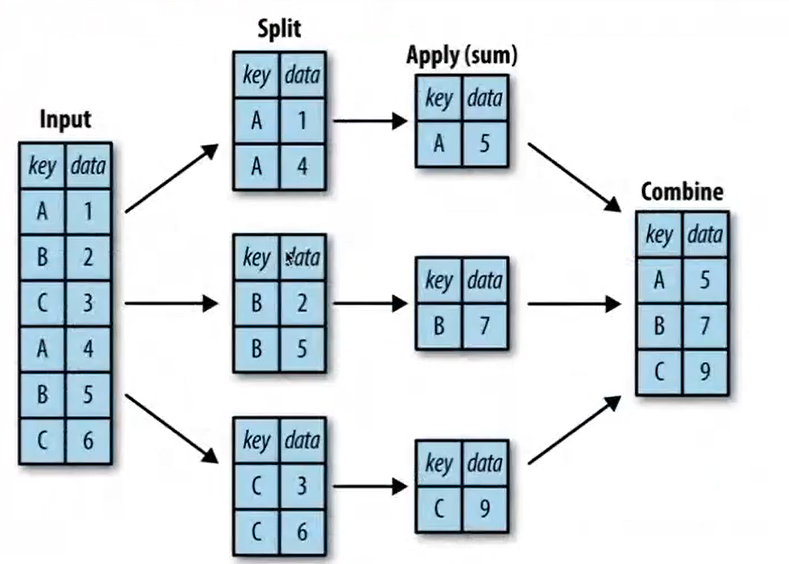

* Consider ' key '   as a   ' director_name ' and  ' data ' as ' budget '  .

* We have split each directors rows in separate groups and then calculated there aggregates ( sum ) and combine them .

* This group by concept is similar to GROUP BY in SQL .

In [ ]:
#Let's do this in pandas to answer above question - 

data.groupby("director_name")      #Step 1

This is a group by object and internally it has grouped by rows into separate rows by director_name . 

In [ ]:
#Lets do remaining two steps to see final output -

data.groupby("director_name")["budget"].max()

director_name
Adam McKay                     100.0
Adam Shankman                   80.0
Alejandro González Iñárritu    135.0
Alex Proyas                    140.0
Alexander Payne                 30.0
                               ...  
Wes Craven                      40.0
Wolfgang Petersen              175.0
Woody Allen                     30.0
Zack Snyder                    250.0
Zhang Yimou                     94.0
Name: budget, Length: 199, dtype: float64

* Finally we get director_name along with there maximum budget values .

In [ ]:
'''
Let's imagine , if you don't have value_count() function so you can use groupby functionality to calculate number of movies directed by each director . 

value_count() function internally called groupby to grouped the rows and counted number of rows .

'''

#Lets use groupby to calculate number of movies directed by each director .


data.groupby("director_name")["title"].count()

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64

In [ ]:
#Which director is most productive director 

'''
You can find productive director based on number of movies directed by any director 

'''


data.groupby("director_name")["title"].count().sort_values(ascending = False)

director_name
Steven Spielberg    26
Clint Eastwood      19
Martin Scorsese     19
Woody Allen         18
Robert Rodriguez    16
                    ..
Paul Weitz           5
John Madden          5
Paul Verhoeven       5
John Whitesell       5
Kevin Reynolds       5
Name: title, Length: 199, dtype: int64

* Steven Spielberg is most productive director , In the way we have defined definition of most productive director .

* Steven Spielberg has directed maximum number of movies .


* Dose directing a lot of movies makes him most productive director ?? --- > > No , But there is a good possibility that Steven Spielberg  can be most productive director .

* What is a reason , Why Steven Spielberg name appears on top ??
* Answer to this question is Steven Spielberg can be active for more years than other directors  .
* Steven Spielberg has spent more time in the directing line .

In [ ]:
#How can we compenset this idea ?

'''
To compenset this idea , Let's find average number of movies directed per year and we have to find no. of active years for each director .

So , Active_yrs = last_workingyear  - first_workingyear

Active_yrs = This column is basically number of years that director has been active .

'''

In [ ]:
#Calculating first working year -

data.groupby("director_name")["year"].min()

director_name
Adam McKay                     2004
Adam Shankman                  2001
Alejandro González Iñárritu    2000
Alex Proyas                    1994
Alexander Payne                1999
                               ... 
Wes Craven                     1984
Wolfgang Petersen              1981
Woody Allen                    1977
Zack Snyder                    2004
Zhang Yimou                    2002
Name: year, Length: 199, dtype: int64

* We are able to find first working year ( first movie released year ) for each director .

In [ ]:
#Calculating last working year -

data.groupby("director_name")["year"].max()

director_name
Adam McKay                     2015
Adam Shankman                  2012
Alejandro González Iñárritu    2015
Alex Proyas                    2016
Alexander Payne                2013
                               ... 
Wes Craven                     2011
Wolfgang Petersen              2006
Woody Allen                    2013
Zack Snyder                    2016
Zhang Yimou                    2014
Name: year, Length: 199, dtype: int64

* We are able to find last working year ( last movie released year ) for each director .

In [ ]:
#Let's say if you are interested in calculating multiple aggregates in one single go -

'''
We have to  groupby director_name and we have to aggregate two things ' year '  and  ' title ' .
For ' year ' we have to calculate min and max .
For ' title ' we have to calculate count .

So to do this  we will provide a list of columns , instead of just one column and we will use ' aggregate method ' .

* In aggregate method we can provide dictionary to calculate aggregates .


'''

data.groupby("director_name")[["year","title"]].aggregate({"year" :["min","max"], "title" : "count"})

year       title
                              min   max count
director_name                                
Adam McKay                   2004  2015     6
Adam Shankman                2001  2012     8
Alejandro González Iñárritu  2000  2015     6
Alex Proyas                  1994  2016     5
Alexander Payne              1999  2013     5
...                           ...   ...   ...
Wes Craven                   1984  2011    10
Wolfgang Petersen            1981  2006     7
Woody Allen                  1977  2013    18
Zack Snyder                  2004  2016     7
Zhang Yimou                  2002  2014     6

[199 rows x 3 columns]

* As you can see , we are able to get minimum , maximum values and count as well .

* Using this min and max we can easily calculate no. of active years of each director . ( max - min )


* max - min / count - - -   > >   this will gives us  average number of movies directed  per year . 


* From above output we have noticed some weired things   - 


* 1 . director_name turned into indexes 

* 2 . year is written once at different level and min , max is written at different level .

* 3 . title  is written at different level and count is written at different level . 


* We can see 2 - layers of columns .

In [ ]:
#Let's understand whats happening here , To do that let save this in df_agg variable -

df_agg = data.groupby("director_name")[["year","title"]].aggregate({"year" :["min","max"], "title" : "count"})

In [ ]:
df_agg           #It's an aggregate based data 

year       title
                              min   max count
director_name                                
Adam McKay                   2004  2015     6
Adam Shankman                2001  2012     8
Alejandro González Iñárritu  2000  2015     6
Alex Proyas                  1994  2016     5
Alexander Payne              1999  2013     5
...                           ...   ...   ...
Wes Craven                   1984  2011    10
Wolfgang Petersen            1981  2006     7
Woody Allen                  1977  2013    18
Zack Snyder                  2004  2016     7
Zhang Yimou                  2002  2014     6

[199 rows x 3 columns]

In [ ]:
#let's print columns of df_agg , because we want to see what's wrong with this columns -

''' You can use columns attributes to print column names '''

df_agg.columns


MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

*  We can see it's not a list but multi - level indexing column .

* The first column  has two levels - 1st level is ' year ' and 2nd level is ' min '  .


*  The second column  has two levels - 1st level is ' year ' and  2nd level is ' max '  .

* The third column has two levels - 1st level is ' title ' and 2nd level is ' count ' .



In [ ]:
#Let's try to get year column -  

df_agg["year"]

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


* When you try to get year column you actually get both min and max columns ,
Because the first level of columns contains both of these columns at the second level both min and max .

In [ ]:
df_agg["title"]

,count
director_name,
Adam McKay,6
Adam Shankman,8
Alejandro González Iñárritu,6
Alex Proyas,5
Alexander Payne,5
...,...
Wes Craven,10
Wolfgang Petersen,7
Woody Allen,18


* This is multi - indexing , We have accidentally create it .

* We will learn how to convert this into simple indexes / columns .

In [ ]:
'''
To convet them , notice that one column is tuple , tuple of two things .
and we just need a simple list of columns so , we can use very simple python function 

'''

df_agg.columns = ["_".join(col) for col in df_agg.columns]

* We are saying join this tuple using an underscore and we are using list comprehension .

* We are combining ' year '  and ' min ' together using underscore . 

In [ ]:
df_agg.columns        #We have changed df_columns to simple list .

Index(['year_min', 'year_max', 'title_count'], dtype='object')

In [ ]:
df_agg

,year_min,year_max,title_count
director_name,,,
Adam McKay,2004,2015,6
Adam Shankman,2001,2012,8
Alejandro González Iñárritu,2000,2015,6
Alex Proyas,1994,2016,5
Alexander Payne,1999,2013,5
...,...,...,...
Wes Craven,1984,2011,10
Wolfgang Petersen,1981,2006,7
Woody Allen,1977,2013,18


In [ ]:
#Now only caveat left is that this director_name is still not a column , it is a row label and we want to change it .

''' To reset indexes we can use reset_index() function .'''


df_agg.reset_index(inplace = True)

In [ ]:
df_agg

,director_name,year_min,year_max,title_count
0,Adam McKay,2004,2015,6
1,Adam Shankman,2001,2012,8
2,Alejandro González Iñárritu,2000,2015,6
3,Alex Proyas,1994,2016,5
4,Alexander Payne,1999,2013,5
...,...,...,...,...
194,Wes Craven,1984,2011,10
195,Wolfgang Petersen,1981,2006,7
196,Woody Allen,1977,2013,18
197,Zack Snyder,2004,2016,7


* retset _ index( ) function resets indexes to the natural once and convert this earlier set of index into a column . 

In [ ]:
#Let's calculate active years -

df_agg["active_yrs"] = df_agg["year_max"] - df_agg["year_min"]

In [ ]:
df_agg

,director_name,year_min,year_max,title_count,active_yrs
0,Adam McKay,2004,2015,6,11
1,Adam Shankman,2001,2012,8,11
2,Alejandro González Iñárritu,2000,2015,6,15
3,Alex Proyas,1994,2016,5,22
4,Alexander Payne,1999,2013,5,14
...,...,...,...,...,...
194,Wes Craven,1984,2011,10,27
195,Wolfgang Petersen,1981,2006,7,25
196,Woody Allen,1977,2013,18,36
197,Zack Snyder,2004,2016,7,12


* This will add one new column   active _ yrs .

In [ ]:
#Let's calculate movies per years -

df_agg["movie_per_yr"] = df_agg["title_count"] / df_agg["active_yrs"]

In [ ]:
df_agg

,director_name,year_min,year_max,title_count,active_yrs,movie_per_yr
0,Adam McKay,2004,2015,6,11,0.545455
1,Adam Shankman,2001,2012,8,11,0.727273
2,Alejandro González Iñárritu,2000,2015,6,15,0.400000
3,Alex Proyas,1994,2016,5,22,0.227273
4,Alexander Payne,1999,2013,5,14,0.357143
...,...,...,...,...,...,...
194,Wes Craven,1984,2011,10,27,0.370370
195,Wolfgang Petersen,1981,2006,7,25,0.280000
196,Woody Allen,1977,2013,18,36,0.500000
197,Zack Snyder,2004,2016,7,12,0.583333


In [ ]:
#Let's sort them to get top five productive directors -

df_agg.sort_values("movie_per_yr", ascending=False).head(5)

,director_name,year_min,year_max,title_count,active_yrs,movie_per_yr
190,Tyler Perry,2006,2013,9,7,1.285714
73,Jason Friedberg,2006,2010,5,4,1.250000
169,Shawn Levy,2002,2014,11,12,0.916667
158,Robert Rodriguez,1992,2014,16,22,0.727273
1,Adam Shankman,2001,2012,8,11,0.727273


* Finally we are able to find top five most productive directors .

* Tyler Perry	who has been come out as the most productive director , Has released nine movies , His active years has been also less which is seven , He has only active from 2006 to 2013 and He has a rate of releasing 1 . 28 movies  per year . 

In [ ]:
#Lecture : Pandas - 2b

In [ ]:
'''
Until now we have learn group based aggregates now we have to learn 'Group Based Filtering .

Group Based Filtering - We want some rows, not  specific to values in that rows but with a property with which is a group based .

'''

In [ ]:
#Question - Filtering all the rows(movies) which are directed by high budget directors .

In [ ]:
#Let's find names of directors who have directed 100M movies -

data.groupby("director_name")["budget"].max()

director_name
Adam McKay                     100.0
Adam Shankman                   80.0
Alejandro González Iñárritu    135.0
Alex Proyas                    140.0
Alexander Payne                 30.0
                               ...  
Wes Craven                      40.0
Wolfgang Petersen              175.0
Woody Allen                     30.0
Zack Snyder                    250.0
Zhang Yimou                     94.0
Name: budget, Length: 199, dtype: float64

In [ ]:
#Let's save this data to df_dir_budget variable which we can use later to filterout -

df_dir_budget = data.groupby("director_name")["budget"].max()

In [ ]:
df_dir_budget

director_name
Adam McKay                     100.0
Adam Shankman                   80.0
Alejandro González Iñárritu    135.0
Alex Proyas                    140.0
Alexander Payne                 30.0
                               ...  
Wes Craven                      40.0
Wolfgang Petersen              175.0
Woody Allen                     30.0
Zack Snyder                    250.0
Zhang Yimou                     94.0
Name: budget, Length: 199, dtype: float64

* This is series .

In [ ]:
#This is series , lets reset indexes - 

df_dir_budget = data.groupby("director_name")["budget"].max().reset_index()

In [ ]:
df_dir_budget

,director_name,budget
0,Adam McKay,100.0
1,Adam Shankman,80.0
2,Alejandro González Iñárritu,135.0
3,Alex Proyas,140.0
4,Alexander Payne,30.0
...,...,...
194,Wes Craven,40.0
195,Wolfgang Petersen,175.0
196,Woody Allen,30.0
197,Zack Snyder,250.0


In [ ]:
#Let's find director whose budget is >= 100 -

df_dir_budget["budget"] >= 100

0       True
1      False
2       True
3       True
4      False
       ...  
194    False
195     True
196    False
197     True
198    False
Name: budget, Length: 199, dtype: bool

In [ ]:
#Let's mask this - 

df_dir_budget.loc[df_dir_budget["budget"] >= 100]

,director_name,budget
0,Adam McKay,100.0
2,Alejandro González Iñárritu,135.0
3,Alex Proyas,140.0
5,Andrew Adamson,225.0
10,Ang Lee,137.0
...,...,...
187,Tom Shadyac,175.0
188,Tom Tykwer,102.0
189,Tony Scott,100.0
195,Wolfgang Petersen,175.0


In [ ]:
#We have to pick director_name - 

high_budget_dir = df_dir_budget.loc[df_dir_budget["budget"] >= 100,"director_name"]

high_budget_dir         #Here we have calculate who are high budget directors .

0                       Adam McKay
2      Alejandro González Iñárritu
3                      Alex Proyas
5                   Andrew Adamson
10                         Ang Lee
                  ...             
187                    Tom Shadyac
188                     Tom Tykwer
189                     Tony Scott
195              Wolfgang Petersen
197                    Zack Snyder
Name: director_name, Length: 85, dtype: object

* We get list of 85 directors who have produce a movies with budget > = 100 million dollars . 

In [ ]:
#Another method to solve this question in one single go - 

'''
  Groupby function also provides a handy method 'filter' to filter out data 

  Filter is saying give me a function which can help me to figure out what to filter , so you can create a lambda function or maybe you can create a function before and pass to 
  filter .

  Here lambda x : x is a group by dataframe and after that we will extract a column name  that we want to work with . 

'''

data.groupby("director_name").filter(lambda x : x["budget"].max() >= 100)     #Here we have calculate all the movies directed by high budget director .

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.00,150,2787.965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.00,139,961.000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.00,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.00,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.00,115,890.871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,48267,0.40,33,100.000000,Mad Max,6.6,1213,1979,Apr,Thursday,George Miller,Male
1451,48268,0.20,13,4.505922,Swingers,6.8,253,1996,Oct,Friday,Doug Liman,Male
1452,48274,0.00,5,2.611555,Three,6.3,31,2010,Dec,Thursday,Tom Tykwer,Male
1458,48335,0.06,27,3.221152,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male


* Here we have calculate all the movies directed by high budget director .

* You can notice movie ' Mad Max	' which has budget 0.40 M which is filtered out because Mad Max	movie is directed by high budget director and that was our end goal . 


* This is doing filtering in one single go and you can see this has actually filtered all the rows who have directed 100 M dollar movies .

In [ ]:
#Let's figureout how many unique directors are there in above output - 

data.groupby("director_name").filter(lambda x: x["budget"].max() >= 100)["director_name"].nunique()

85

In [ ]:
#Group Based Transformation - transformation of features using their group properties

# Feature/Column Transformation - Budget/Revenue dollors -> m dollars

In [ ]:
#Question - Assess every movie wrt director average budget -

''' A - 100 50 150. , average budget 100 cr, 

100 - 0
50 - -50
150 = +50  ''' 

* Until now , we have column budget of movies now , instead of giving me budget , give me additional budget .

* Let's say there is director ' A ' , he produce three movies , and there budget are 100 cr , 50 cr , 150 cr .


* So the average budget of director ' A ' is 100 cr .


* To convert this 100 , 50 , 150 , we would change them to additional budget which this movies took as compare to average budget .

* 1 .  A - - > 100 CR - Takes ' 0 ' additional budget as compare to the average budget of director .

* 2 . A - - > 50 CR -  Takes ' - 50 ' less  as compare to the average budget of director .

* 3 . A - - > Takes  additional 50 cr   ' + 50 ' relative to the average budget of director .

In [ ]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237.000,150,2787.965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300.000,139,961.000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245.000,107,880.674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250.000,112,1084.939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258.000,115,890.871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0.000,3,0.321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male
1461,48370,0.027,19,3.151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male
1462,48375,0.000,7,0.000000,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0.000,3,0.000000,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male


In [ ]:
'''
  We might be interested to know that how additional expensive was Bahubali to RAJA MOULI  -  

'''

data["budget"]


0       237.000
1       300.000
2       245.000
3       250.000
4       258.000
         ...   
1460      0.000
1461      0.027
1462      0.000
1463      0.000
1464      0.220
Name: budget, Length: 1465, dtype: float64

In [ ]:
def subtract_avg(x):
  x["additional_budget"] = x["budget"] - x["budget"].mean()

data.groupby("director_name").transform(subtract_avg)

KeyError: ignored

In [ ]:
def inspect(x):
  print(x)
  print(type(x))
  raise

data.groupby("director_name").transform(inspect)


176    43882
323    44151
366    44236
505    44503
839    45301
916    45443
Name: id_x, dtype: int64
<class 'pandas.core.series.Series'>


RuntimeError: ignored

* Transform function works with a column/series and not a dataframe .

In [ ]:
def subtract_avg(x):
  return x - x.mean()

data.groupby("director_name")["budget"].transform(subtract_avg)

0       1.303000e+08
1       1.418571e+08
2       1.501429e+08
3       1.243750e+08
4       1.740045e+08
            ...     
1460   -4.747895e+07
1461   -1.197942e+07
1462   -2.170000e+07
1463   -1.089091e+07
1464   -3.116875e+07
Name: budget, Length: 1465, dtype: float64

In [ ]:
#Add column additional budget - 

data["addtional_budget"] = data.groupby("director_name")["budget"].transform(subtract_avg)
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender,addtional_budget
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male,1.303000e+08
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male,1.418571e+08
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male,1.501429e+08
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male,1.243750e+08
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male,1.740045e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male,-4.747895e+07
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male,-1.197942e+07
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male,-2.170000e+07
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male,-1.089091e+07


In [ ]:
'''
  The problem with transform method is it can only work with series , which means although we can use group based properties , but we can use group based property of that specific
  column that we are trying to transform .

  Here we are working with budget column so we can probably only use budget based property , budget based aggregates to make changes over here . 

'''

In [ ]:
'''
We might want to subtract some aggregates of some other columns , so here tranform would won't work .

So we have one more function to learn -

'''
# Apply function () - 

#For a movie, if it was risky for a director or not - whose budget was even higher than average revenue of the movies director by same director

In [ ]:
def func(x):
  x["risky"] = x["budget"] - x["revenue"].mean() >= 0
  return x

df_risky = data.groupby("director_name").apply(func)         #Apply function .

In [ ]:
df_risky["risky"] == True  #Mask 

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Name: risky, Length: 1465, dtype: bool

In [ ]:
df_risky.loc[df_risky["risky"] == True]        #Filter out rows where risky happens to be True 

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,addtional_budget,risky
7,43608,200.0,107,586.090727,Quantum of Solace,6.1,2965,2008,Oct,Thursday,Marc Forster,Male,136.312500,True
12,43614,380.0,135,1045.713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,May,Saturday,Rob Marshall,Male,252.000000,True
15,43618,200.0,37,310.669540,Robin Hood,6.2,1398,2010,May,Wednesday,Ridley Scott,Male,119.375000,True
20,43624,209.0,64,303.025485,Battleship,5.5,2114,2012,Apr,Wednesday,Peter Berg,Male,111.666667,True
24,43630,210.0,3,459.359555,X-Men: The Last Stand,6.3,3525,2006,May,Wednesday,Brett Ratner,Male,119.666667,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,47224,5.0,7,3.263585,The Sweet Hereafter,6.8,103,1997,May,Wednesday,Atom Egoyan,Male,-2.500000,True
1349,47229,5.0,3,4.842699,90 Minutes in Heaven,5.4,40,2015,Sep,Friday,Michael Polish,Male,0.800000,True
1351,47233,5.0,6,0.000000,Light Sleeper,5.7,15,1992,Aug,Friday,Paul Schrader,NaN,-1.208333,True
1356,47263,15.0,10,0.000000,Dying of the Light,4.5,118,2014,Dec,Thursday,Paul Schrader,NaN,8.791667,True


In [ ]:
# aggregate - for all rows, group based
# filtering - values in rows, or based some group based properties
# transformation - values in rows, or group based properties to do that transformation